# Mushrooms Classification

This example demonstrates how to classify muhsrooms as edible or not. It also answer the question: what are the main characteristics of an edible mushroom?

The data set is available on the Machine Learning Repository of the UC Irvine website: http://archive.ics.uci.edu/ml/datasets/Mushroom

## Loading and reading Data
The data are reading as a csv file from the website given above.
There are 8124 mushrooms in the dataset and each observation consists of 23 variables. Indeed, the data frame doesn’t look very meaningfull. It is needed to go back to the source to bring meaning to each of the variables and to the various levels of the categorical variables.

To suppress package startup messages, we use the ``suppressPackageStartupMessages()`` function. 

In [1]:
suppressPackageStartupMessages(for (package in c('caret','readr','ggplot2','magrittr','ggthemes','dplyr',
                  'corrplot','caTools','purrr','tidyverse', 'rpart', 'rpart.plot', 'pROC', 'kableExtra', 'randomForest')) {
  if (!require(package, character.only=T, quietly=T)) {
    install.packages(package)
    library(package,character.only=T)
  }
})

In [2]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom <- read.csv(url, header = FALSE, sep = ",")

By looking the data structure, we can see the follwing:

In [3]:
str(mushroom)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

## Tidy the data

We will start by giving names to each of the variables, then we specify the category for each variable. It is not necessary to do so but it does add meaning to what we do.

We rename the variables and exceptionally only the target categories:

In [4]:
colnames(mushroom) <- c('target', 'cap.shape', 'cap.surface', 'cap.color',
                        'bruises', 'odor', 'gill.attachment', 'gill.spacing',
                        'gill.size', 'gill.color', 'stalk.shape',
                        'stalk.root', 'stalk.surface.above.ring', 'stalk.surface.below.ring',
                        'stalk.color.above.ring', 'stalk.color.below.ring', 'veil.type', 'veil.color',
                        'ring.number', 'ring.type', 'spore.print.color', 'population', 'habitat')

levels(mushroom$target) <- c("edible", "poisonous")

Let's looking again the structure of data:

In [5]:
str(mushroom)

'data.frame':	8124 obs. of  23 variables:
 $ target                  : Factor w/ 2 levels "edible","poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 .

Let’s counting and displaying the categories for each variable:  

In [6]:
number_class <- function(x){
  x <- length(levels(x))
}

dframe <- mushroom %>% map_dbl(function(.x) number_class(.x)) %>% tibble::enframe() %>% 
       rownames_to_column() %>% arrange(desc(value))
colnames(dframe) <- c("index variable", "variable name", "number of levels")

dframe

index variable,variable name,number of levels
<chr>,<chr>,<dbl>
10,gill.color,12
4,cap.color,10
6,odor,9
15,stalk.color.above.ring,9
16,stalk.color.below.ring,9
21,spore.print.color,9
23,habitat,7
2,cap.shape,6
22,population,6


It is possible to infere the importance of each feature against the edible/poisonous property of the mushrooms. The following code makes this possible.

In [7]:
mushroom_table <- lapply(seq(from=2, to=ncol(mushroom)), 
                         function(x) {table(mushroom$target, mushroom[,x])})
names(mushroom_table) <- colnames(mushroom)[2:ncol(mushroom)]
for(i in 1:length(mushroom_table)) {
    print("======================================")
    print(names(mushroom_table)[i])
    print(mushroom_table[[i]]) 
}

[1] "======================================"
[1] "cap.shape"
           
               b    c    f    k    s    x
  edible     404    0 1596  228   32 1948
  poisonous   48    4 1556  600    0 1708
[1] "======================================"
[1] "cap.surface"
           
               f    g    s    y
  edible    1560    0 1144 1504
  poisonous  760    4 1412 1740
[1] "======================================"
[1] "cap.color"
           
               b    c    e    g    n    p    r    u    w    y
  edible      48   32  624 1032 1264   56   16   16  720  400
  poisonous  120   12  876  808 1020   88    0    0  320  672
[1] "======================================"
[1] "bruises"
           
               f    t
  edible    1456 2752
  poisonous 3292  624
[1] "======================================"
[1] "odor"
           
               a    c    f    l    m    n    p    s    y
  edible     400    0    0  400    0 3408    0    0    0
  poisonous    0  192 2160    0   36  120  256  576 

## Transform the data

We noticed an issue with the veil.type variable. This one has only one factor. So basically, it does not bring any information. Furthermore, factor variable with only one level do create issues later on at the modeling task. So let’s take away that column:

In [8]:
mushroom <- mushroom[- which(colnames(mushroom) == "veil.type")]

or 

Verify now if the data have missing values:

In [9]:
map_dbl(mushroom, function(.x) {sum(is.na(.x))})

target                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring               veil.color              ring.number 
                       0                        0                        0 
               ring.type        spore.print.color               population 
                       0                        0                        0 
                 habitat 
                       0

        => Good, there are no missing data!

## Visualize the data

Data visualization can gives us unexpected insights and often allows us to ask the right questions.

Using the ``table()`` function to understand the proportion of target class or labels of mushrooms in the data. As shown, there are 4208 (51,8%) edible observations against 3916 (48,2%) observations that are poisonous mushrooms.

In [10]:
table(mushroom$target)


   edible poisonous 
     4208      3916 

In [11]:
table(mushroom$target)/length(mushroom$target)*100


   edible poisonous 
 51.79714  48.20286 

Let's define a generic data visualization:

In [12]:
dataVis <- function(data, x, y, col) {
    x <- rlang::sym(x)
    y <- rlang::sym(y)
    col <- rlang::sym(col)
    
    ggplot(data = data, aes(x = !!x , y = !!y , col = !!col)) + 
        geom_jitter(alpha = 0.5) + 
        scale_color_manual(values = c("green", "red"))
}

### Cap color vs. cap surface

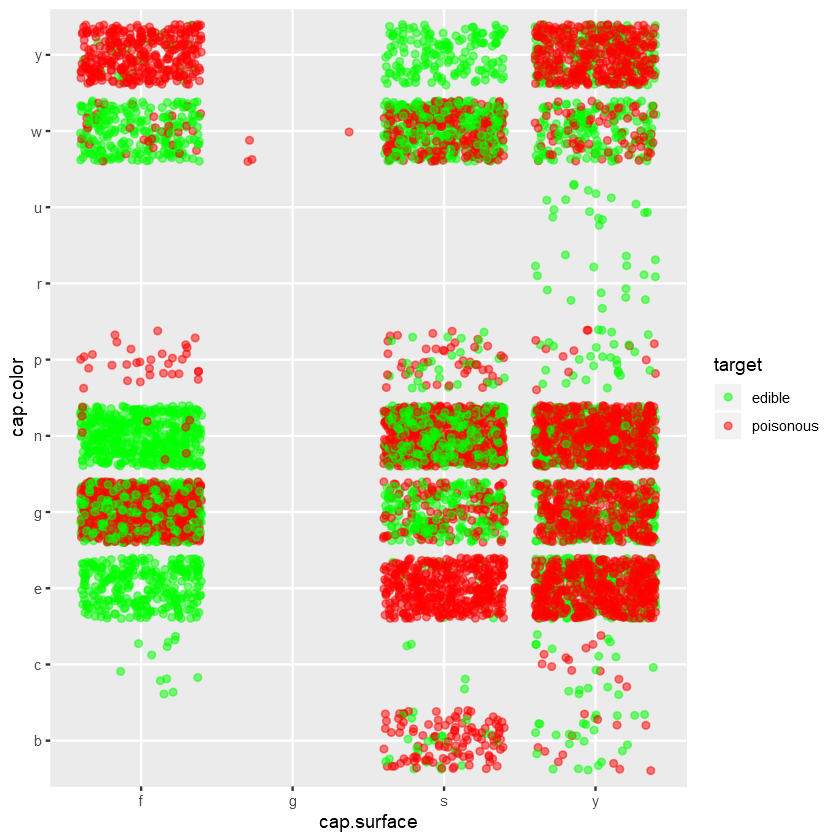

In [13]:
set.seed(1)
dataVis(data = mushroom, x = 'cap.surface', y = 'cap.color', col = 'target')

According to these insights, better bet on fibrous surface. Stay especially away from smooth surface, except if they are purple or green.

### Cap color vs. cap shape

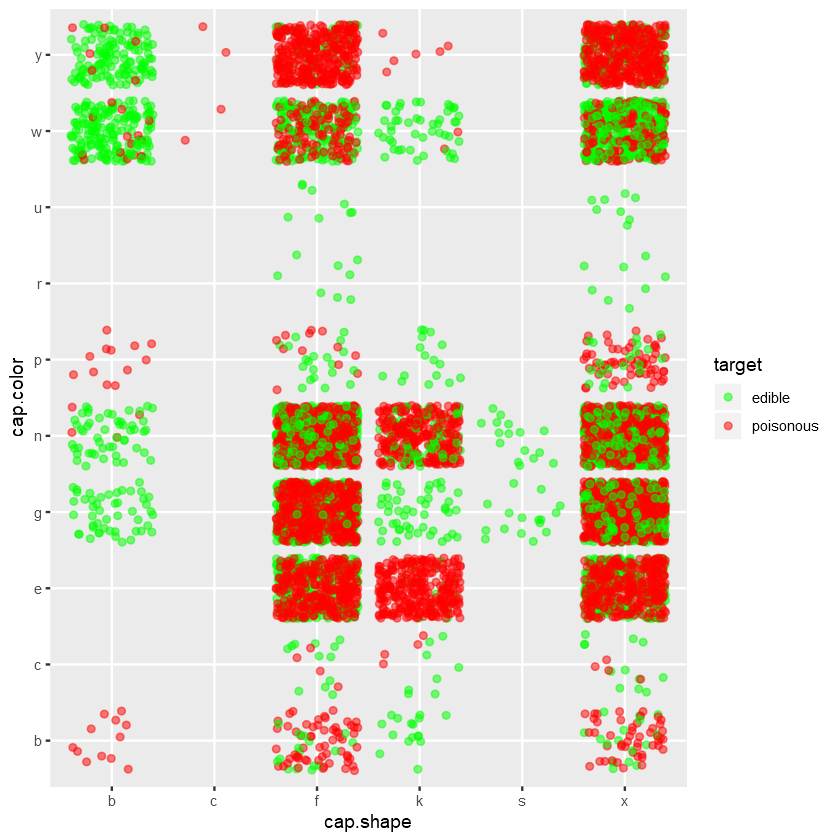

In [14]:
set.seed(1)
dataVis(data = mushroom, x = 'cap.shape', y = 'cap.color', col = 'target')

It seems that is better to stay away from all shapes except maybe for bell shape mushrooms.

### Cap color vs. gill color

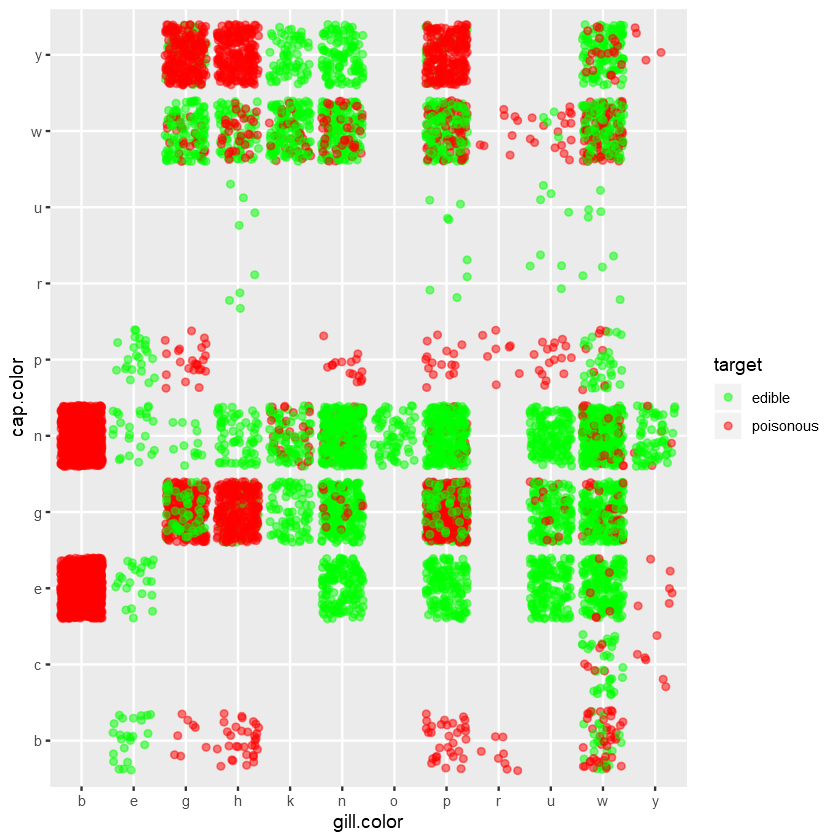

In [15]:
set.seed(1)
dataVis(data = mushroom, x = 'gill.color', y = 'cap.color', col = 'target')

### Odor vs. target

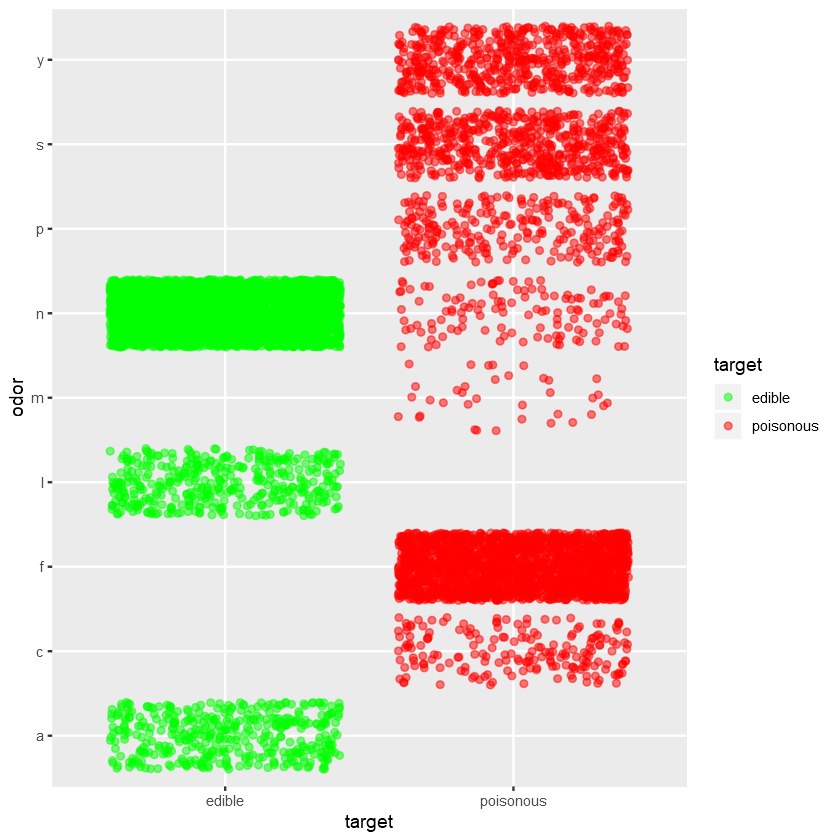

In [16]:
set.seed(1)
dataVis(data = mushroom, x = 'target', y = 'odor', col = 'target')

Odor is quite an informative predictor. Basically, if it smells fishy, spicy or pungent just stay away. If it smells like anise or almond you can go ahead. If it doesn’t smell anything, you have better chance that it is edible than not.

This analysis is on a dataset containing information on over 8,000 species of mushrooms. Each mushroom species is classified as either poisonous or edible and has various other characteristics that can be used in determining the edibility of the mushroom. Two primary machine learning techniques were used to model the mushroom dataset, Support Vector Machines and Decision Trees.

## Model Creation

This next chunk of code splits the mushroom dataset into a training and a testing set. This allows us to build our model with the training set and test its accuracy with the testing set. The “80-20 split” is a traditional way of building and testing models. The document of createDataPartition from caret package states that by default, such a function does a stratified random split of the data.

#### Data Splitting

For creating train test splits, the random sampling is done within the levels of y when y is a factor in an attempt to balance the class distributions within the splits. 

I will take 80% of sample data for training & 20% for testing.

In [17]:
set.seed(1023)
trainsamples <- createDataPartition(y = mushroom$target, p = 0.8, list = FALSE)
train_mushroom <- mushroom[ trainsamples, ]
test_mushroom  <- mushroom[-trainsamples, ]

#### Control parameters for train
The function trainControl can be used to specifiy the type of resampling. It generates parameters that further control how models are created, with possible values:
* method: The resampling method: "boot", "cv", "LOOCV", "LGOCV", "repeatedcv", "timeslice", "none" and "oob". The last value, out-of-bag estimates, can only be used by random forest, bagged trees, bagged earth, bagged flexible discriminant analysis, or conditional tree forest models. GBM models are not included (the gbm package maintainer has indicated that it would not be a good idea to choose tuning parameter values based on the model OOB error estimates with boosted trees). Also, for leave-one-out cross-validation, no uncertainty estimates are given for the resampled performance measures.
* number and repeats: number controls with the number of folds in K-fold cross-validation or number of resampling iterations for bootstrapping and leave-group-out cross-validation. repeats applied only to repeated K-fold cross-validation. Suppose that method = "repeatedcv", number = 10 and repeats = 3,then three separate 10-fold cross-validations are used as the resampling scheme.

In the sequel, we will use a simple 10-folds cross-validation.

In [18]:
fitControl <- trainControl(method = "cv", number = 10)

Let's define some generic functions:

In [19]:
plotROC <- function(actual_data, predicted_data) {
    pROC_obj <- roc(as.integer(actual_data), as.integer(predicted_data),
                    smoothed = TRUE,  direction="<",
                    # arguments for ci
                    ci=TRUE, ci.alpha=0.9, stratified=FALSE,
                    # arguments for plot
                    plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
                    print.auc=TRUE, show.thres=TRUE)
    sens.ci <- ci.se(pROC_obj)
    plot(sens.ci, type="shape", col="lightblue")
    plot(sens.ci, type="bars")
}

In [20]:
modelprint <- function(model, test_data) {
    print("=========================================")
    print(model)
    print("=========================================")
    print(varImp(model))
    print("=========================================")
    print(confusionMatrix(data = predict(model, newdata = test_data), test_data$target, positive='poisonous'))
    print("=========================================")
    plotROC(test_data$target, predict(model, test_data))
}

### Decision Tree

[1] "========================================="
CART 

6500 samples
  21 predictor
   2 classes: 'edible', 'poisonous' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5849, 5850, 5850, 5850, 5850, 5850, ... 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa    
  0.0466007  0.9580061  0.9159616
  0.1254389  0.9135507  0.8277764
  0.7647622  0.6950219  0.3730451

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0466007.
[1] "========================================="
rpart variable importance

  only 20 most important variables shown (out of 95)

                          Overall
odorn                      100.00
ring.typep                  70.52
odorf                       63.14
stalk.surface.above.ringk   55.00
stalk.surface.below.ringk   53.57
stalk.rootc                 29.69
bruisest                    27.19
odorl                       23.81
habitatm    

Setting levels: control = 1, case = 2
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
"Low definition shape."

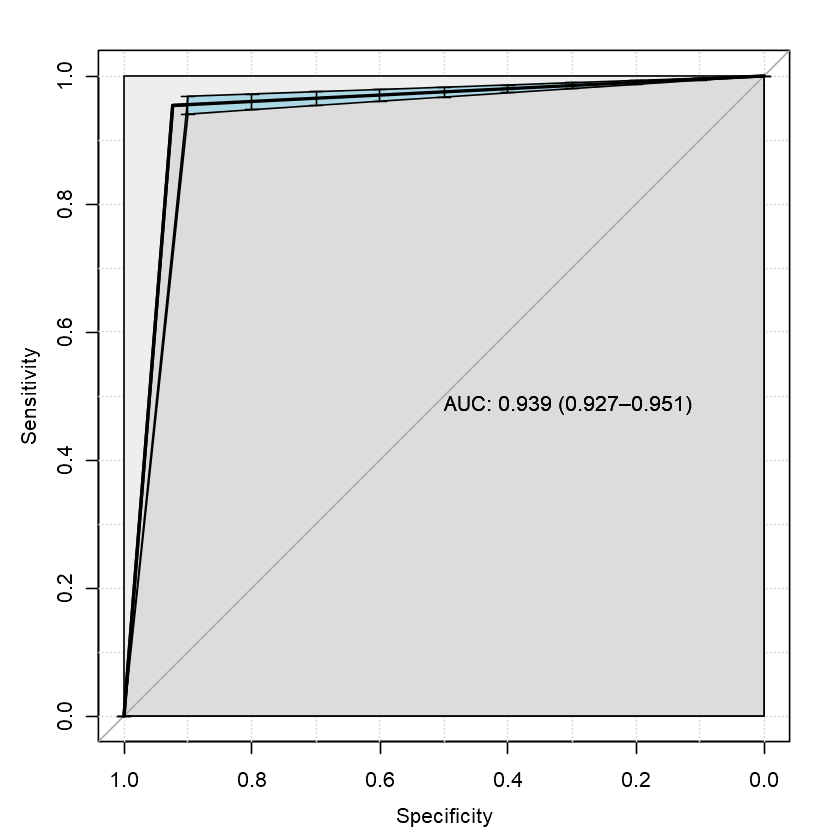

In [21]:
dtree_model <- suppressWarnings(train(target ~ ., 
                                  data = train_mushroom, 
                                  method ="rpart", 
                                  trControl = fitControl,
                                  metric = 'Accuracy'))

modelprint(dtree_model, test_mushroom)

### Linear Discriminant Analysis

[1] "========================================="
Linear Discriminant Analysis 

6500 samples
  21 predictor
   2 classes: 'edible', 'poisonous' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5849, 5850, 5850, 5849, 5851, 5851, ... 
Resampling results:

  Accuracy   Kappa    
  0.9996154  0.9992296

[1] "========================================="
ROC curve variable importance

  only 20 most important variables shown (out of 21)

                         Importance
gill.color                  100.000
gill.size                    82.499
bruises                      81.950
ring.type                    76.650
stalk.root                   70.005
stalk.surface.above.ring     67.923
stalk.surface.below.ring     65.657
gill.spacing                 41.628
habitat                      40.137
population                   38.841
stalk.color.above.ring       29.422
stalk.color.below.ring       29.126
cap.surface                  27.940
odor                       

Setting levels: control = 1, case = 2
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
"Low definition shape."

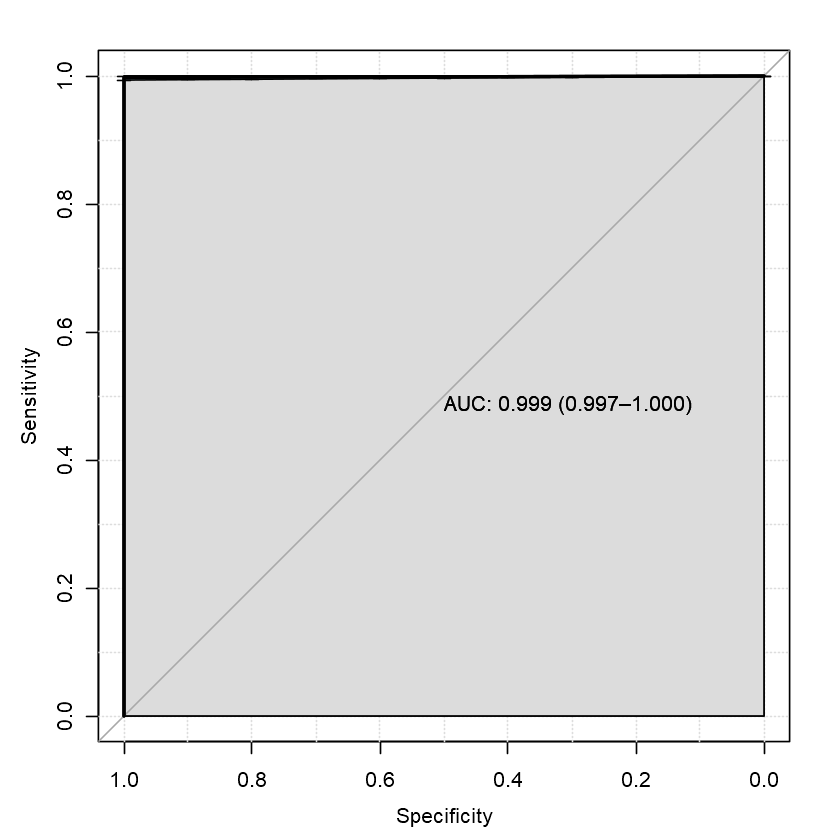

In [22]:
lda_model <- suppressWarnings(train(target ~ ., 
                                  data = train_mushroom, 
                                  method ="lda", 
                                  trControl = fitControl,
                                  metric = 'Accuracy'))

modelprint(lda_model, test_mushroom)

### k-Nearest Neighbour

[1] "========================================="
k-Nearest Neighbors 

6500 samples
  21 predictor
   2 classes: 'edible', 'poisonous' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5850, 5850, 5849, 5850, 5850, 5851, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9996923  0.9993838
  7  0.9993846  0.9987676
  9  0.9993846  0.9987676

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.
[1] "========================================="
ROC curve variable importance

  only 20 most important variables shown (out of 21)

                         Importance
gill.color                  100.000
gill.size                    82.499
bruises                      81.950
ring.type                    76.650
stalk.root                   70.005
stalk.surface.above.ring     67.923
stalk.surface.below.ring     65.657
gill.spacing                 41.628
habitat         

Setting levels: control = 1, case = 2
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
"Low definition shape."

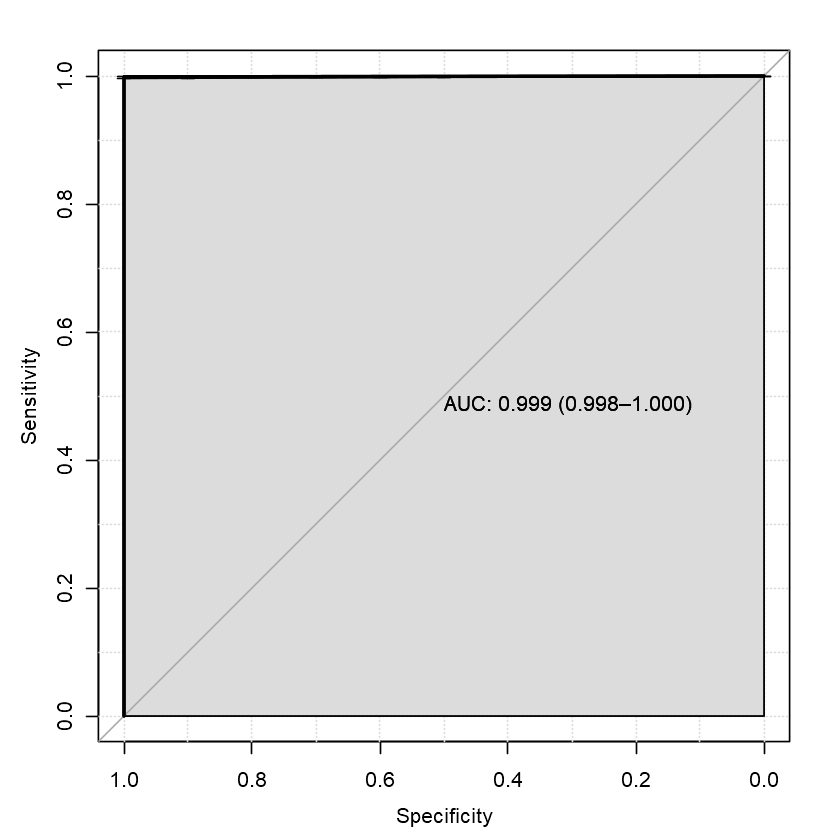

In [23]:
knn_model <- suppressWarnings(train(target ~ ., 
                                  data = train_mushroom, 
                                  method ="knn", 
                                  trControl = fitControl,
                                  metric = 'Accuracy'))

modelprint(knn_model, test_mushroom)

### Random Forest

In [ ]:
rf_model <- suppressWarnings(train(target ~ ., 
                                  data = train_mushroom, 
                                  method ="rf", 
                                  trControl = fitControl,
                                  metric = 'Accuracy'))

modelprint(rf_model, test_mushroom)

## Conclusion
All the results given by the different classification algorithms are promising, especially with the random forest which is perfect giving the impression that is an overfitting case. However, we should remember that it is applied the randomly splitting to the data to obtain the train and test subsets and fitting the models using the k-folds cross validation methods. Based on these arguments, we can discard the overfitting hypothesis and concluded that the random forest classifier is the best one. 